# Spanning Tree
-  그래프의 최소 연결 부분 그래프를 의미한다. 
- 모두 연결돼있으면서, 간선 수가 가장 적다는 뜻이다.
- n개의 정점을 가지는 그래프의 최소 간선의 수는 n-1개이다. (필요충분조건)
- 반대로 그래프가 n-1개의 간선으로 연결된 경우, 그 그래프는 그것은 tree이자 spanning tree가 된다.



### 신장 트리의 조건
  - 본래의 그래프의 모든 노드를 포함해야한다.
  - 그래프의 모든 노드 n개가 서로 연결되어 있어야하며, 그 간선의 수는 n-1개이다.
  - 트리의 속성을 만족시켜야한다. (사이클이 존재하지 않는다.)
  - DFS, BFS를 이용하여 탐색도중에 발견한 간선을 모으면 신장트리를 구성할 수 있다.
  - 하나의 그래프에는 많은 신장트리를 만들 수 있다(그래프에서 신장트리를 만들 수 있는 방법은 여러가지일 수 있다.)
    - 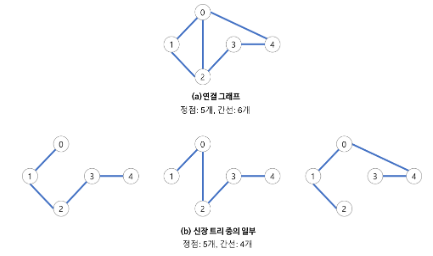


# Minimum spanning tree(MST, 최소신장트리)
- Spanning tree중에서 간선들의 가중치의 합이 최소인 tree.
  - 현실에서 가중치는 `길이, 비용, 전송시간` 등으로 볼 수 있으며, 문제에 이러한 표현이 있는 경우를 대비해 참고한다.
- 그래프에서 신장트리를 만드는 방법이 여러개 있고, 그중에서 가중치의 합이 최소인 신장트리를 말한다.

### MST의 특징
- 간선의 가중치의 합이 최소이다.
- n개의 정점을 가지는 그래프의 최소 간선의 수는 n-1개이다. (필요충분조건)
- 사이클이 포함되어서는 안된다.

### Kruskal MST
- greedy를 이용하여 네트워크의 모든 정점을 최소비용으로 연결하는 최적 해답을 구한다.
- 각 단계에서 사이클을 이루지 않는 최소비용 간선을 선택한다.
- 이전 단계에서 만들어진 신장트리와 상관없이 최소 간선만 선택한다.
- 시간복잡도는 $O(n log n)$이며, 희소그래프가 주워질 경우 적합하다.



### Kruskal 알고리즘 동작
- 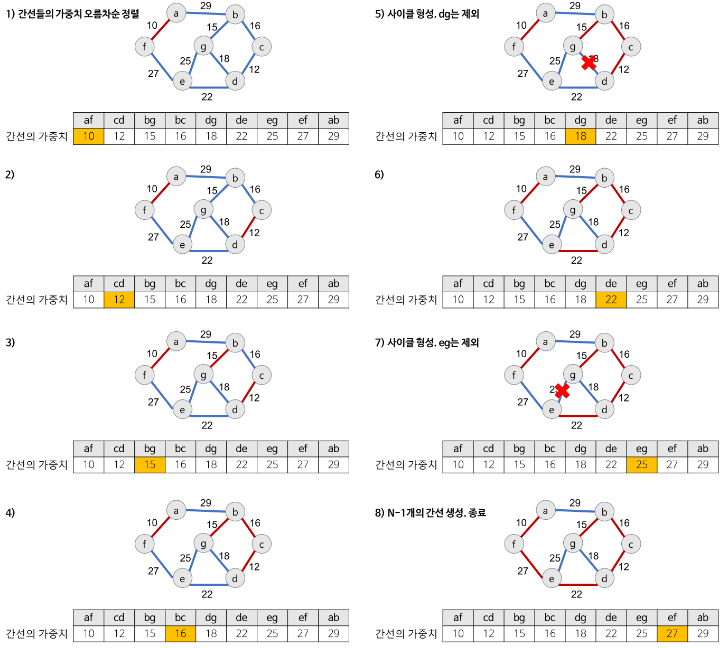
1. 그래프의 간선들을 가중치의 오름차순으로 정렬한다.
2. 가중치가 가장 낮은 간선을 선택한다.
    - 이때, 사이클을 형성하는 간선을 union find를 통해 제외한다.
3. 해당 간선을 현재의 MST에 추가한다.

In [ ]:
N, E = map(int, input().split())
U = [0] * E
V = [0] * E
W = [0] * E
for i in range(E):
  u, v, w = map(int, input().split())
  U[i], V[i], W[i] = u-1, v-1, w

class UF:
  def __init__(self, n):
    self.p = list(range(n))

  def find(self, a):
    a_ = a
    while a != self.p[a]:
      a = self.p[a]
    while a_ != a:
      self.p[a_], a_ = a, self.p[a_]
    return a

  def merge(self, a, b):
    self.p[self.find(b)] = self.find(a)

def kruskal(n, U, V, W): 
  uni = UF(n)
  c, merge_cnt = 0, 0
  mst_u, mst_v = [], []
  L = sorted(range(len(W)), key=lambda x: W[x]) #1.간선들을 오름차순으로 정렬한다.
  for i in range(len(W)):
    u, v = U[L[i]], V[L[i]]
    fu, fv = uni.find(u), uni.find(v)
    if fu != fv: #2.부모가 같은지 확인한다(사이클이 생기는지 확인)
      c += W[L[i]]
      merge_cnt += 1
      uni.p[fv] = fu
      mst_u.append(u), mst_v.append(v) 

  return c, mst_u, mst_v, n == 1 + merge_cnt 
  #c: 최소신장 연결비용
  #mst_u, mst_v: 최소신장트리를 구성하는 간선들의 출발점과 도착점(각 i번째 간선에 대해 mst_u[i]에서 mst_v[i]로 연결하면 MST가 만들어진다.)
  #n == 1 + merge_cnt : 모든 노드가 연결됐는지 확인(입력으로 주워진 간선 전부가 MST에 포함됐는지 확인)


- 비용만 구하는 버전

In [ ]:
N, E = map(int, input().split())
U = [0] * E
V = [0] * E
W = [0] * E
for i in range(E):
  u, v, w = map(int, input().split())
  U[i], V[i], W[i] = u-1, v-1, w

class UF:
  def __init__(self, n):
    self.p = list(range(n))

  def find(self, a):
    a_ = a
    while a != self.p[a]:
      a = self.p[a]
    while a_ != a:
      self.p[a_], a_ = a, self.p[a_]
    return a

  def merge(self, a, b):
    self.p[self.find(b)] = self.find(a)

def kruskal(n, U, V, W): 
  uni = UF(n)
  c = 0
  L = sorted(range(len(W)), key=lambda x: W[x])
  for i in range(len(W)):
    u, v = U[L[i]], V[L[i]]
    fu, fv = uni.find(u), uni.find(v)
    if fu != fv:
      c += W[L[i]]
      uni.p[fv] = fu

  return c

### Prim MST
- 시작정점에서 출발해서 신장트리 집합을 단계적으로 확장해나가는 방법.
- $O(n^2)$의 시간복잡도를 가지며, 밀집그래프가 주워질 경우 적합하다.
  - 주 반복문이 정점의 수 n만큼 반복, 내부 반복문이 n번 반복

### Prim MST 동작
1. 시작 정점을 MST 집합에 포함시킨다.
2. 앞 단계에서 만들어진 MST 집합에 인접한 정점들 중에서 최소 간선으로 연결된 정점을 선택하여 트리를 확장한다.
    - 즉, 가장 낮은 가중치를 탐색한다(비 정렬이므로 O(n))
3. 위 과정을 n-1개의 간선을 가질 때 까지 반복한다.

In [ ]:
import heapq

N, E = map(int, input().split())
G = [[] for _ in range(N+1)]
for i in range(E):
  u, v, w = map(int, input().split())
  G[u].append((v, w))

def prim(graph_used):
  vis=[]
  heap=[[1,0]]
  prim = set() #사용된 정점? 사용처가 없다
  mincost=0

  while len(heap) > 0:
    node, cost = heapq.heappop(heap)
    if node in vis:
      continue

    mincost += cost
    prim.add(node)
    vis.append(node)

    for distance, adjacent in graph_used[node]:
      if adjacent not in vis:
        heapq.heappush(heap, [distance, adjacent])

  return mincost

- 간선도 출력하는 문제(메모리 사용량에 주의)

In [ ]:
N, E = map(int, input().split())
G = [[float("inf")] * (N+1) for _ in range(N+1)]
for i in range(E):
  u, v, w = map(int, input().split())
  G[u][v] = w
  G[v][u] = w

def prim(n, adj):
  total_weight = 0
  selected, min_e = [False] * (n+1), [[float("inf"), -1] for _ in range(n+1)]
  mst_edges = []

  min_e[1][0] = 0

  for _ in range(n):
    v = -1

    for j in range(1, n+1):
      if (not selected[j]) and ((v == -1) or (min_e[j][0] < min_e[v][0])):
        v = j

    if min_e[v][0] == float("inf"):
      return None, None

    selected[v] = True
    total_weight += min_e[v][0]

    if min_e[v][1] != -1:
      mst_edges.append((v, min_e[v][1]))

    for to in range(1, n+1):
      if adj[v][to] < min_e[to][0]:
        min_e[to] = [adj[v][to], v]

  return mst_edges, total_weight